In [296]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import time
import matplotlib.pyplot as plt

**Open csv**

In [297]:
df=pd.read_csv("C:/Users/lagg/Desktop/giuliaa/alberta/Study_Hopsking/new_inputs/df_mix.csv")

df=pd.DataFrame(df)

df["DateTime"]=pd.to_datetime(df["DateTime"])
df

,Unnamed: 0,DateTime,RealPower,EV_Power,Timestamp,month,season_fall,season_spring,season_summer,season_winter,day,Vacation,summer_classes,Theres_sun,temp_ant,Hour,Average_hour_month,Its_higher_than_average,Average_hour_day_ant,Its_higher_than_average_day_ant
0,96,2019-04-02 00:00:00,51.488,0.0,1554163200000000000,4,False,True,False,False,2,False,0,False,16.1,0,52.269892,0,51.17875,0
1,97,2019-04-02 00:15:00,51.794,0.0,1554164100000000000,4,False,True,False,False,2,False,0,False,16.1,0,52.269892,0,51.17875,0
2,98,2019-04-02 00:30:00,51.397,0.0,1554165000000000000,4,False,True,False,False,2,False,0,False,16.1,0,52.269892,0,51.17875,0
3,99,2019-04-02 00:45:00,50.765,0.0,1554165900000000000,4,False,True,False,False,2,False,0,False,16.1,0,52.269892,0,51.17875,0
4,100,2019-04-02 01:00:00,51.206,0.0,1554166800000000000,4,False,True,False,False,2,False,0,False,16.1,1,51.763875,0,51.05075,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,26395,2019-12-31 22:45:00,38.313,0.0,1577832300000000000,12,False,False,False,True,31,True,0,False,10.0,22,40.184637,0,38.95800,0
26300,26396,2019-12-31 23:00:00,38.493,0.0,1577833200000000000,12,False,False,False,True,31,True,0,False,10.0,23,40.048847,0,38.56300,0
26301,26397,2019-12-31 23:15:00,38.577,0.0,1577834100000000000,12,False,False,False,True,31,True,0,False,10.0,23,40.048847,0,38.56300,0
26302,26398,2019-12-31 23:30:00,38.619,0.0,1577835000000000000,12,False,False,False,True,31,True,0,False,10.0,23,40.048847,0,38.56300,0


**Eliminate variables with no correlation**

In [298]:
del df["Unnamed: 0"]
del df["season_fall"]
del df["season_spring"]
del df["season_summer"]
del df["season_winter"]
del df["day"]
del df["summer_classes"]
del df["Hour"]
del df["Its_higher_than_average"]
del df["Its_higher_than_average_day_ant"]
del df["DateTime"]

df

,RealPower,EV_Power,Timestamp,month,Vacation,Theres_sun,temp_ant,Average_hour_month,Average_hour_day_ant
0,51.488,0.0,1554163200000000000,4,False,False,16.1,52.269892,51.17875
1,51.794,0.0,1554164100000000000,4,False,False,16.1,52.269892,51.17875
2,51.397,0.0,1554165000000000000,4,False,False,16.1,52.269892,51.17875
3,50.765,0.0,1554165900000000000,4,False,False,16.1,52.269892,51.17875
4,51.206,0.0,1554166800000000000,4,False,False,16.1,51.763875,51.05075
...,...,...,...,...,...,...,...,...,...
26299,38.313,0.0,1577832300000000000,12,True,False,10.0,40.184637,38.95800
26300,38.493,0.0,1577833200000000000,12,True,False,10.0,40.048847,38.56300
26301,38.577,0.0,1577834100000000000,12,True,False,10.0,40.048847,38.56300
26302,38.619,0.0,1577835000000000000,12,True,False,10.0,40.048847,38.56300


In [299]:
df["Timestamp"]=df["Timestamp"].astype("int64")//10**9
df

,RealPower,EV_Power,Timestamp,month,Vacation,Theres_sun,temp_ant,Average_hour_month,Average_hour_day_ant
0,51.488,0.0,1554163200,4,False,False,16.1,52.269892,51.17875
1,51.794,0.0,1554164100,4,False,False,16.1,52.269892,51.17875
2,51.397,0.0,1554165000,4,False,False,16.1,52.269892,51.17875
3,50.765,0.0,1554165900,4,False,False,16.1,52.269892,51.17875
4,51.206,0.0,1554166800,4,False,False,16.1,51.763875,51.05075
...,...,...,...,...,...,...,...,...,...
26299,38.313,0.0,1577832300,12,True,False,10.0,40.184637,38.95800
26300,38.493,0.0,1577833200,12,True,False,10.0,40.048847,38.56300
26301,38.577,0.0,1577834100,12,True,False,10.0,40.048847,38.56300
26302,38.619,0.0,1577835000,12,True,False,10.0,40.048847,38.56300


In [300]:
df.describe()

,RealPower,EV_Power,Timestamp,month,temp_ant,Average_hour_month,Average_hour_day_ant
count,26304.000000,26304.000000,2.630400e+04,26304.000000,26304.000000,26304.000000,26304.000000
mean,48.307932,6.167214,1.566000e+09,8.021898,10.168863,48.305800,48.365179
std,5.717560,9.099070,6.834110e+06,2.572977,86.698863,4.685430,5.451674
min,-1.161000,-6.400000,1.554163e+09,4.000000,-999.900000,37.582581,24.301250
25%,45.886000,0.000000,1.560081e+09,6.000000,15.560000,45.643573,46.230312
50%,48.319000,0.000000,1.566000e+09,8.000000,17.800000,48.419089,48.350000
75%,51.776500,9.480000,1.571918e+09,10.000000,20.000000,52.001367,51.845500
max,82.339000,55.150000,1.577836e+09,12.000000,34.400000,56.401933,75.317750


In [301]:
df=df[(df["temp_ant"]>0)]
df=df[(df["RealPower"]>0)]

df.describe()

,RealPower,EV_Power,Timestamp,month,temp_ant,Average_hour_month,Average_hour_day_ant
count,26111.000000,26111.000000,2.611100e+04,26111.000000,26111.000000,26111.000000,26111.000000
mean,48.302173,6.136909,1.565951e+09,8.003638,17.595568,48.321839,48.359379
std,5.725720,9.072460,6.835987e+06,2.573282,3.841343,4.692138,5.469791
min,8.410000,-6.400000,1.554163e+09,4.000000,5.000000,37.582581,24.301250
25%,45.860000,0.000000,1.560038e+09,6.000000,15.560000,45.730331,46.197250
50%,48.315000,0.000000,1.565913e+09,8.000000,17.800000,48.419089,48.341500
75%,51.784000,9.440000,1.571788e+09,10.000000,20.000000,52.001367,51.877500
max,82.339000,55.150000,1.577836e+09,12.000000,34.400000,56.401933,75.317750


**LSTM: Normalization**

In [302]:
# Función para generar las particiones preservando las características
# de la serie de tiempo

def train_val_test_split(serie, tr_size=0.8, vl_size=0.1, ts_size=0.1 ):
    # Definir número de datos en cada subserie
    N = serie.shape[0]
    Ntrain = int(tr_size*N)  # Número de datos de entrenamiento
    Nval = int(vl_size*N)    # Número de datos de validación
    Ntst = N - Ntrain - Nval # Número de datos de prueba

    # Realizar partición
    train = serie[0:Ntrain]
    val = serie[Ntrain:Ntrain+Nval]
    test = serie[Ntrain+Nval:]

    return train, val, test

# Prueba de la función
tr, vl, ts = train_val_test_split(df)

print(f'Tamaño set de entrenamiento: {tr.shape}')
print(f'Tamaño set de validación: {vl.shape}')
print(f'Tamaño set de prueba: {ts.shape}')


Tamaño set de entrenamiento: (20888, 9)
Tamaño set de validación: (2611, 9)
Tamaño set de prueba: (2612, 9)


In [303]:
window = 96 
OUTPUT_LENGTH = 1

def crear_dataset_supervisado(array, window, output_length):

    X, Y = [], []    #list where will store the values for the input (96) and the output (1)
    
    fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-window-output_length):
        X.append(array[i:i+window,0:cols])
        Y.append(array[i+window:i+window+output_length,0].reshape(output_length,1))
    
    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)
    
    return X, Y

In [304]:
x_tr, y_tr = crear_dataset_supervisado(tr.values, window, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, window, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, window, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (20791, 96, 9), y_tr: (20791, 1, 1)
Set de validación - x_vl: (2514, 96, 9), y_vl: (2514, 1, 1)
Set de prueba - x_ts: (2515, 96, 9), y_ts: (2515, 1, 1)


In [305]:
x_total=np.concatenate((x_tr,x_vl,x_ts), axis=0)

**LSTM: Standardization of Training data (-1,1)**

In [306]:
from sklearn.preprocessing import MinMaxScaler

def scaler(data_input):

    x_total=np.concatenate((data_input["x_tr"],data_input["x_vl"],data_input["x_ts"]), axis=0)

    NFEATS = data_input['x_tr'].shape[2] #10

    scaler = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)]

    # Arreglos que contendrán los datasets escalados
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)
    total = np.zeros(x_total.shape)


    for i in range(NFEATS):
        total[:,:,i]=scaler[i].fit_transform(x_total[:,:,i])

    for i in range(NFEATS):
        x_tr_s[:, :, i] = scaler[i].transform(data_input['x_tr'][:, :, i])
        x_vl_s[:, :, i] = scaler[i].transform(data_input['x_vl'][:, :, i])
        x_ts_s[:, :, i] = scaler[i].transform(data_input['x_ts'][:, :, i])
    
    # Escalamiento Ys
    y_scaler = MinMaxScaler(feature_range=(-1, 1))
    y_tr_s[:, :, 0] = y_scaler.fit_transform(data_input['y_tr'][:, :, 0])
    y_vl_s[:, :, 0] = y_scaler.transform(data_input['y_vl'][:, :, 0])
    y_ts_s[:, :, 0] = y_scaler.transform(data_input['y_ts'][:, :, 0])

    # Conformar diccionario de salida
    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    return data_scaled, scaler, y_scaler

In [307]:
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# Y escalar
data_s, scaler, y_scaler = scaler(data_in)

# Extraer subsets escalados
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

In [308]:
# Suponiendo que tu array tridimensional se llama 'data_array'
min_values = np.min(x_ts_s, axis=(0, 1, 2))
max_values = np.max(x_ts_s, axis=(0, 1, 2))

print("Valor mínimo por dimensión:", min_values)
print("Valor máximo por dimensión:", max_values)

Valor mínimo por dimensión: -1.0000000000000004
Valor máximo por dimensión: 1.0


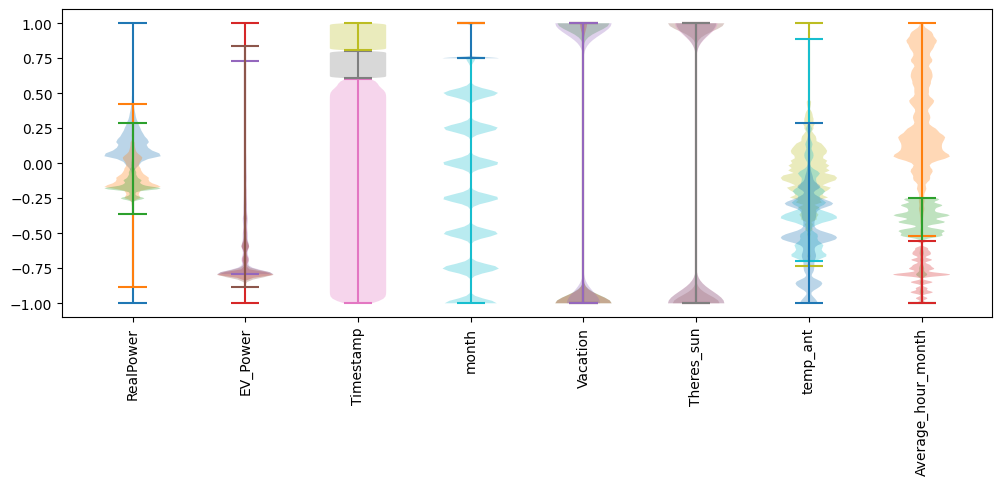

In [309]:
NFEATS = x_tr.shape[2]

fig, ax=plt.subplots(figsize=(12,4))

for i in range (8):
    ax.violinplot(dataset=x_tr_s[:,:,i].flatten(), positions=[i])
    ax.violinplot(dataset=x_vl_s[:,:,i].flatten(), positions=[i])
    ax.violinplot(dataset=x_ts_s[:,:,i].flatten(), positions=[i])

ax.set_xticks(list(range(NFEATS)))
ax.set_xticklabels(df.keys(), rotation=90)
ax.autoscale()


[Text(1, 0, 'RealPower (output)')]

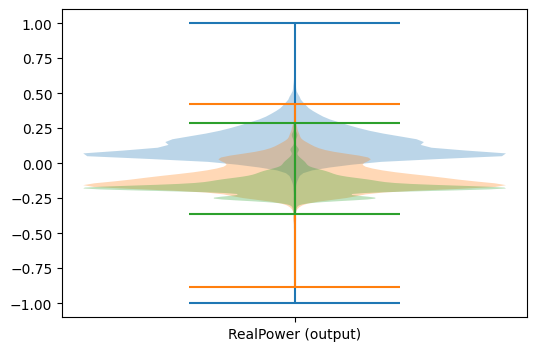

In [310]:
fig, ax=plt.subplots(figsize=(6,4))

ax.violinplot(dataset=y_tr_s.flatten())
ax.violinplot(dataset=y_vl_s.flatten())
ax.violinplot(dataset=y_ts_s.flatten())

ax.set_xticks([1])
ax.set_xticklabels(["RealPower (output)"])

**LSTM:Model**

In [311]:
# Creación del modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

# El modelo
N_UNITS = 128 # Tamaño del estado oculto (h) y de la celda de memoria (c)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2]) # 24 (horas) x 1 (feature)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
modelo.add(Dense(OUTPUT_LENGTH, activation='linear')) # activation = 'linear' pues queremos pronosticar (regresión)

# Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
# pues permite tener errores en las mismas unidades de la temperatura
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

# Compilación
optimizador = RMSprop(learning_rate=5e-6)
modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error,
    metrics=["accuracy"]
)

# Entrenamiento (aproximadamente 1 min usando GPU)
EPOCHS = 110 # Hiperparámetro
BATCH_SIZE = 256 # Hiperparámetro
historia = modelo.fit(
    x = x_tr_s,
    y = y_tr_s,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl_s, y_vl_s),
    verbose=2
)

Epoch 1/110
82/82 - 21s - loss: 0.1410 - accuracy: 0.0000e+00 - val_loss: 0.1499 - val_accuracy: 0.0000e+00 - 21s/epoch - 256ms/step
Epoch 2/110
82/82 - 17s - loss: 0.1139 - accuracy: 0.0000e+00 - val_loss: 0.1535 - val_accuracy: 0.0000e+00 - 17s/epoch - 202ms/step
Epoch 3/110
82/82 - 17s - loss: 0.1004 - accuracy: 0.0000e+00 - val_loss: 0.1685 - val_accuracy: 0.0000e+00 - 17s/epoch - 207ms/step
Epoch 4/110
82/82 - 17s - loss: 0.0944 - accuracy: 0.0000e+00 - val_loss: 0.1750 - val_accuracy: 0.0000e+00 - 17s/epoch - 208ms/step
Epoch 5/110
82/82 - 17s - loss: 0.0907 - accuracy: 0.0000e+00 - val_loss: 0.1705 - val_accuracy: 0.0000e+00 - 17s/epoch - 205ms/step
Epoch 6/110
82/82 - 17s - loss: 0.0878 - accuracy: 0.0000e+00 - val_loss: 0.1637 - val_accuracy: 0.0000e+00 - 17s/epoch - 207ms/step
Epoch 7/110
82/82 - 17s - loss: 0.0854 - accuracy: 0.0000e+00 - val_loss: 0.1579 - val_accuracy: 0.0000e+00 - 17s/epoch - 212ms/step
Epoch 8/110
82/82 - 19s - loss: 0.0834 - accuracy: 0.0000e+00 - val_l

*Plot loss*

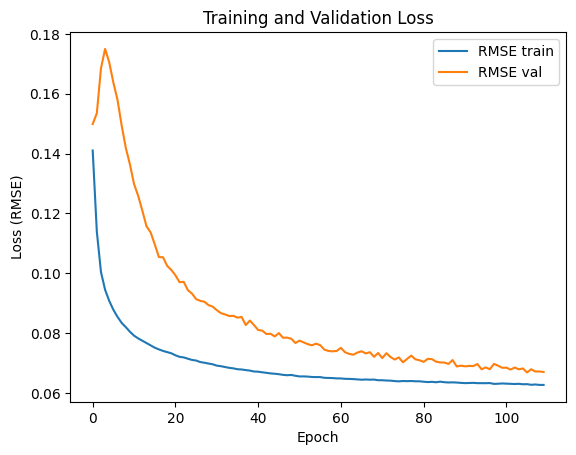

In [312]:
 # Graficar curvas de entrenamiento y validación
 # para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Epoch')
plt.ylabel('Loss (RMSE)')
plt.title('Training and Validation Loss')

plt.legend()

*Prediction of training values using final model*

In [313]:
y_predict_train= modelo.predict(x_tr_s)

y_predict_train_trans= y_scaler.inverse_transform(y_predict_train)

y_mesuared_train= y_scaler.inverse_transform(y_tr_s[:,:,0])


650/650 [==============================] - 13s 19ms/step


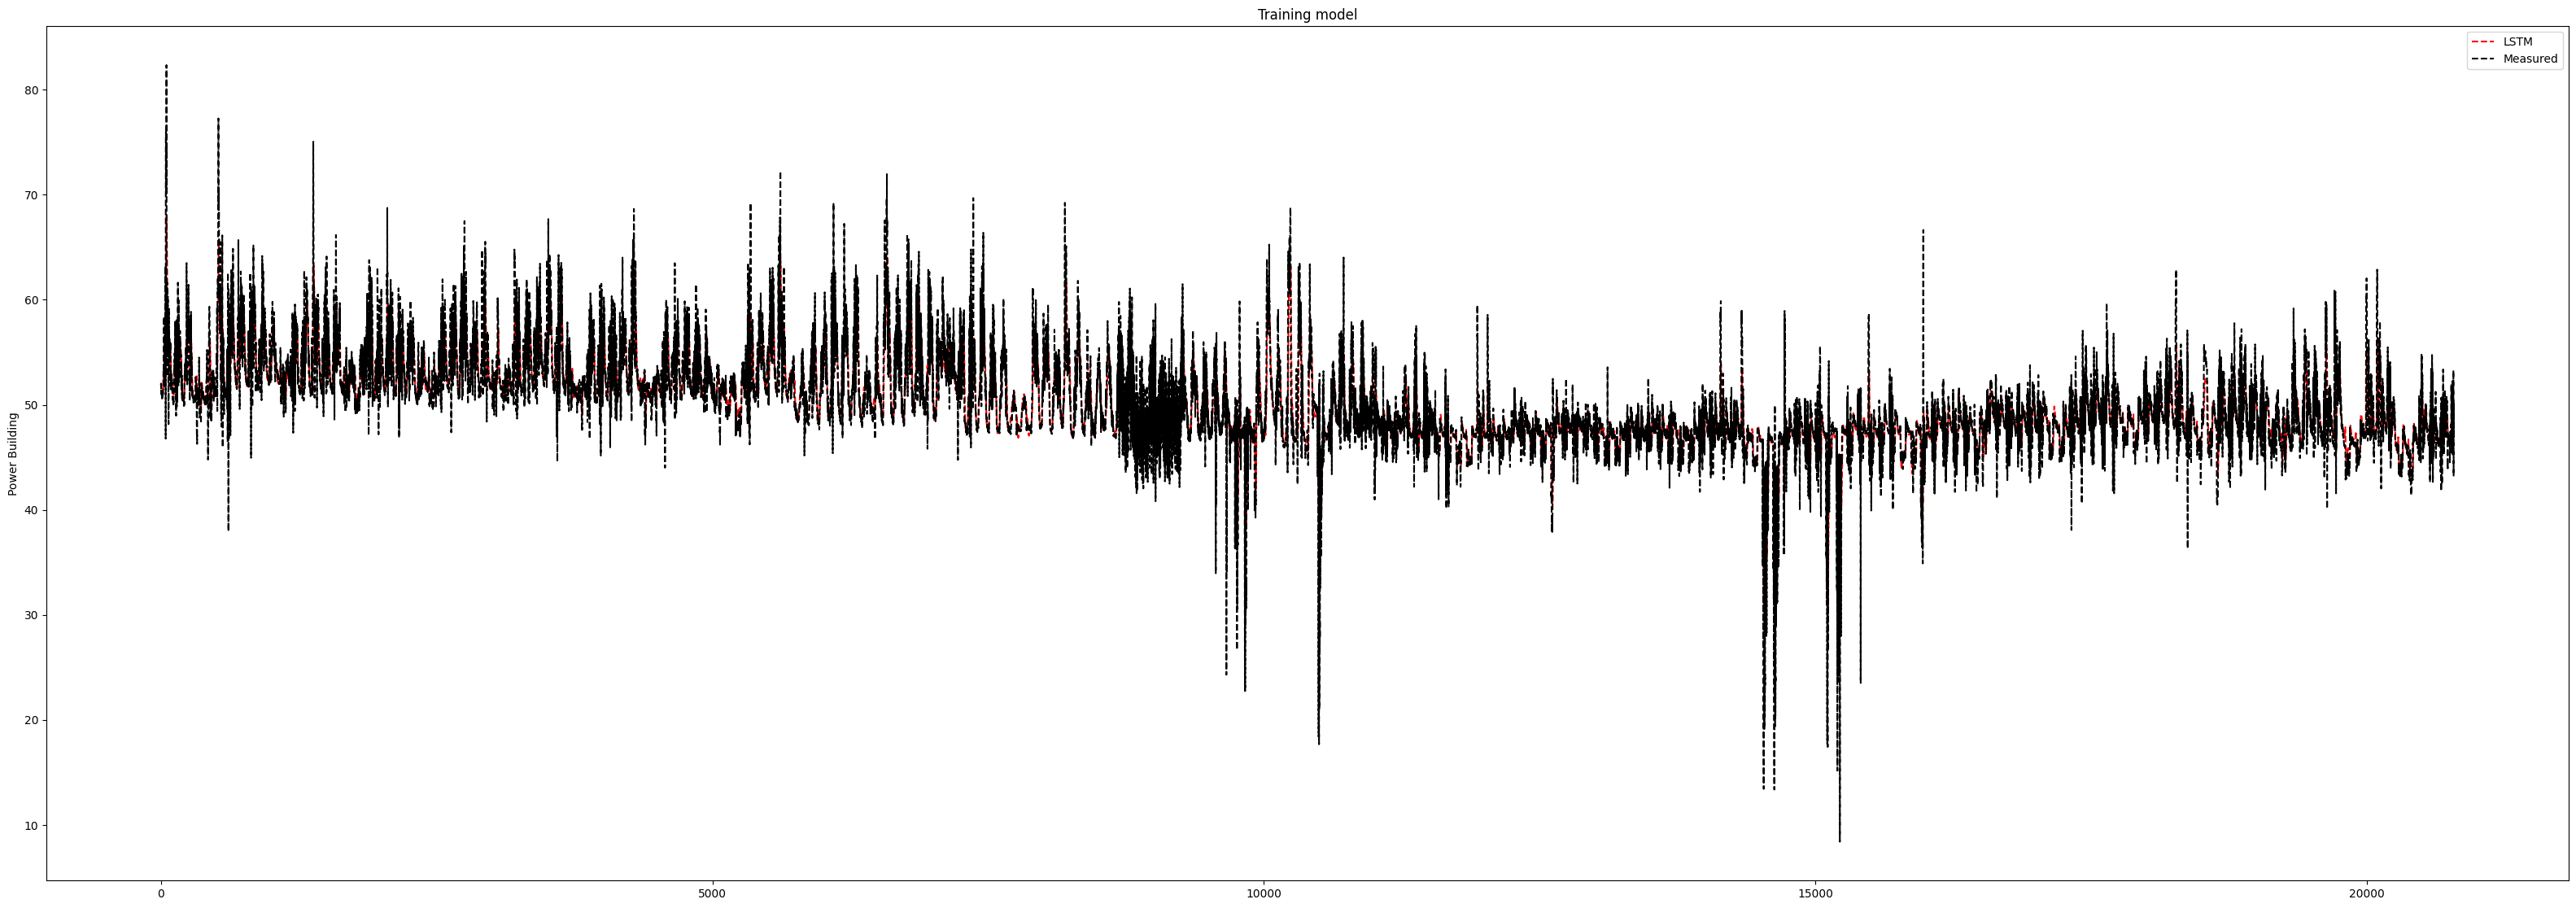

In [314]:
plt.figure(figsize=(40,30))
plt.subplot(2,1,1)
plt.plot( y_predict_train_trans, "r--", label="LSTM")
plt.plot(y_mesuared_train, "k--", label="Measured")
plt.ylabel("Power Building")
plt.title('Training model')

plt.legend()

**Model performace**

In [315]:
# Find the rmses for training, validation and set test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Print the results
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr[0]:.3f}')
print(f'  RMSE val:\t {rmse_vl[0]:.3f}')
print(f'  RMSE test:\t {rmse_ts[0]:.3f}')

Comparativo desempeños:
  RMSE train:	 0.051
  RMSE val:	 0.063
  RMSE test:	 0.064


**LSTM: Prediction of testing set using training model**

In [316]:
y_predict= modelo.predict(x_ts_s)

y_predict_trans= y_scaler.inverse_transform(y_predict)

y_mesuared= y_scaler.inverse_transform(y_ts_s[:,:,0])

79/79 [==============================] - 1s 18ms/step


In [317]:
y_mesuared[-10:] #last 10 predicted values

array([[38.424],
       [38.288],
       [38.932],
       [39.218],
       [38.82 ],
       [38.481],
       [38.313],
       [38.493],
       [38.577],
       [38.619]])

*Plot of mesuared value between lstm model*

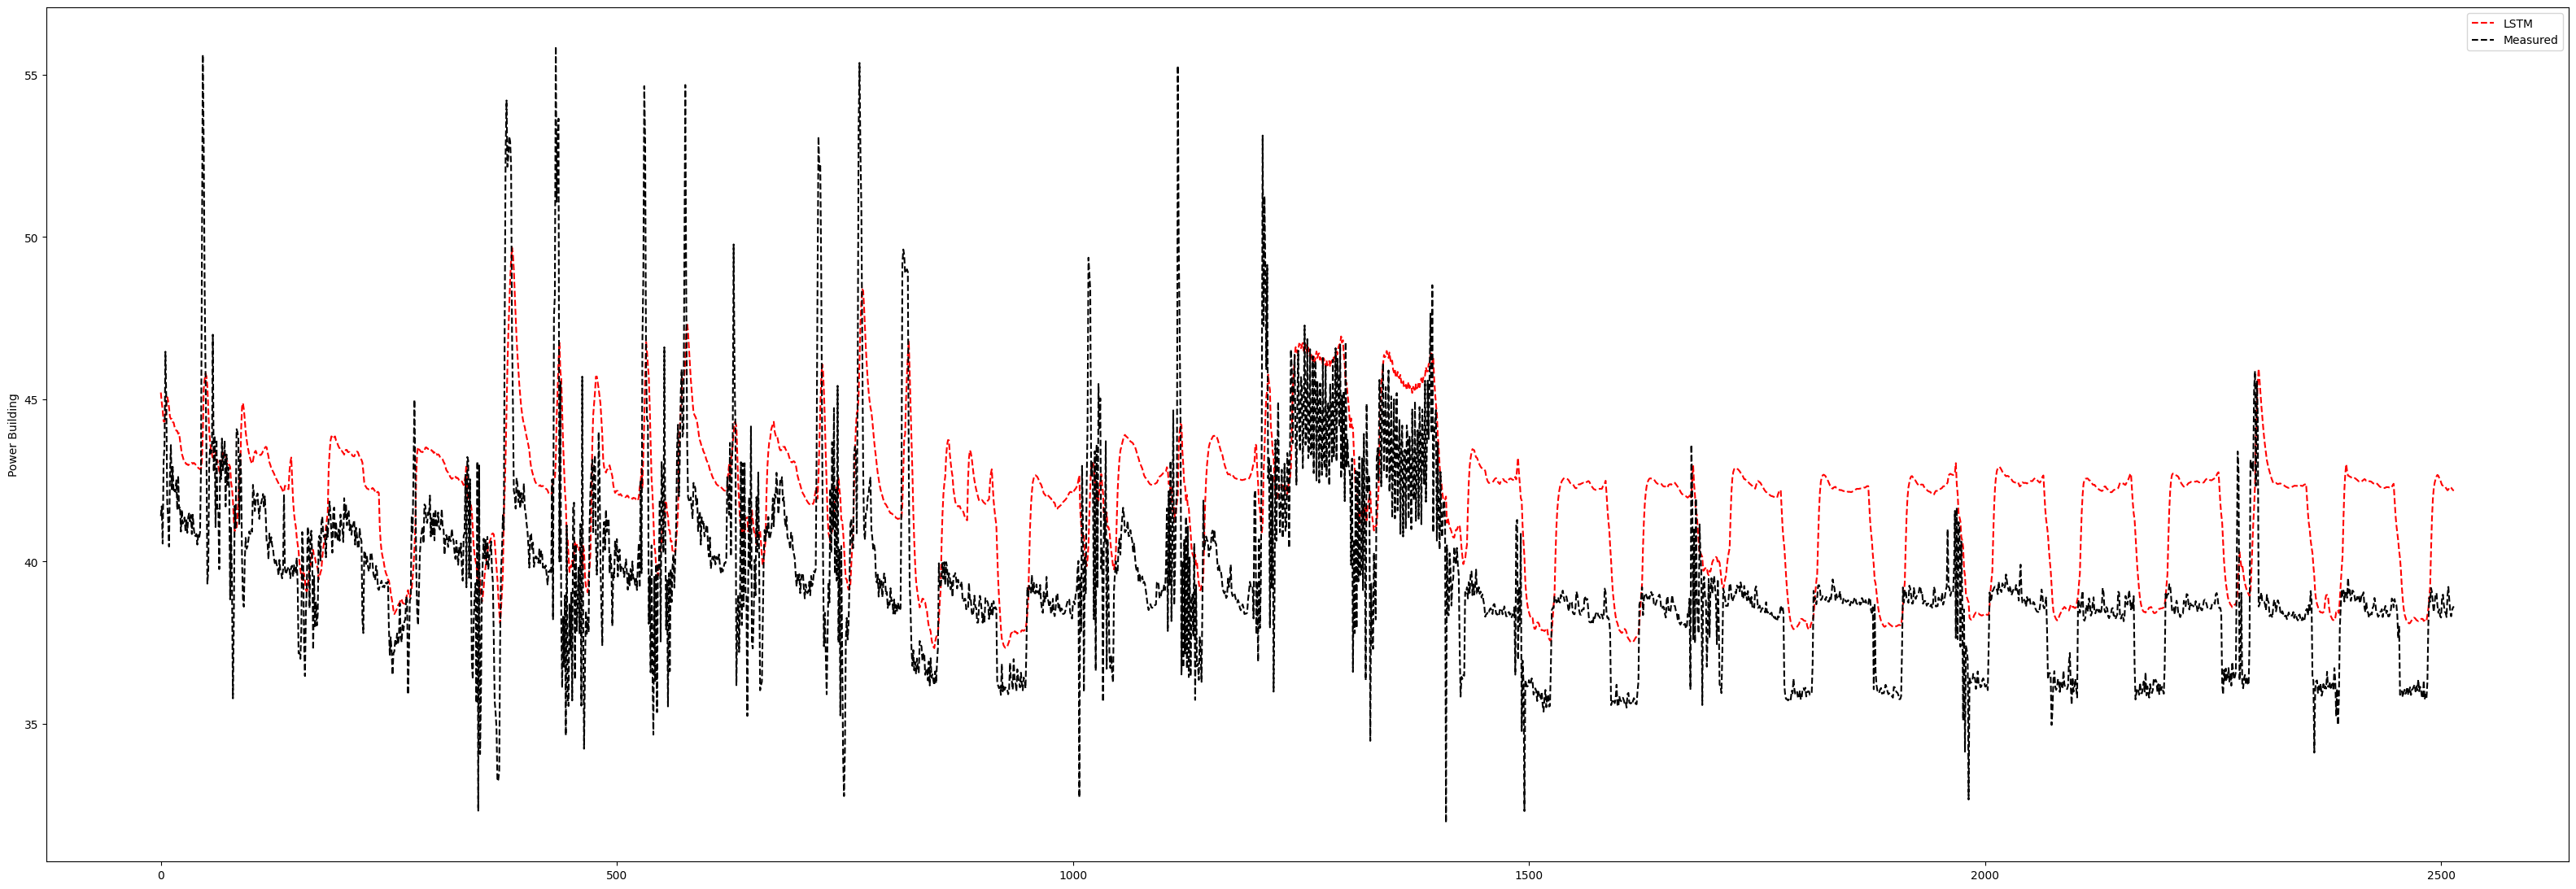

In [295]:
plt.figure(figsize=(40,30))
plt.subplot(2,1,1)
plt.plot( y_predict_trans, "r--", label="LSTM")
plt.plot(y_mesuared, "k--", label="Measured")
plt.ylabel("Power Building")
plt.legend()

**Using predicted values to predict next step**

the initial model is loaded and used to make predictions on the test data, but the input data (Xtsq) is also updated at each iteration based on the previous prediction, implying a "recursive prediction" or "on-line prediction" approach.

In [ ]:
Xtsq=Xts.copy()

v=load_model("model")

for i in range(window, len(Xtsq)):
    Xin=Xtsq[i-window:i].reshape(1,window,8)
    prediction = v.predict(Xin)
    Xtsq[i][0] = prediction[0][0] 
    Yti[i-window]=Xtsq[i][0]


Ytu=s2.inverse_transform(Yti)



1/1 [==============================] - 0s 31ms/step


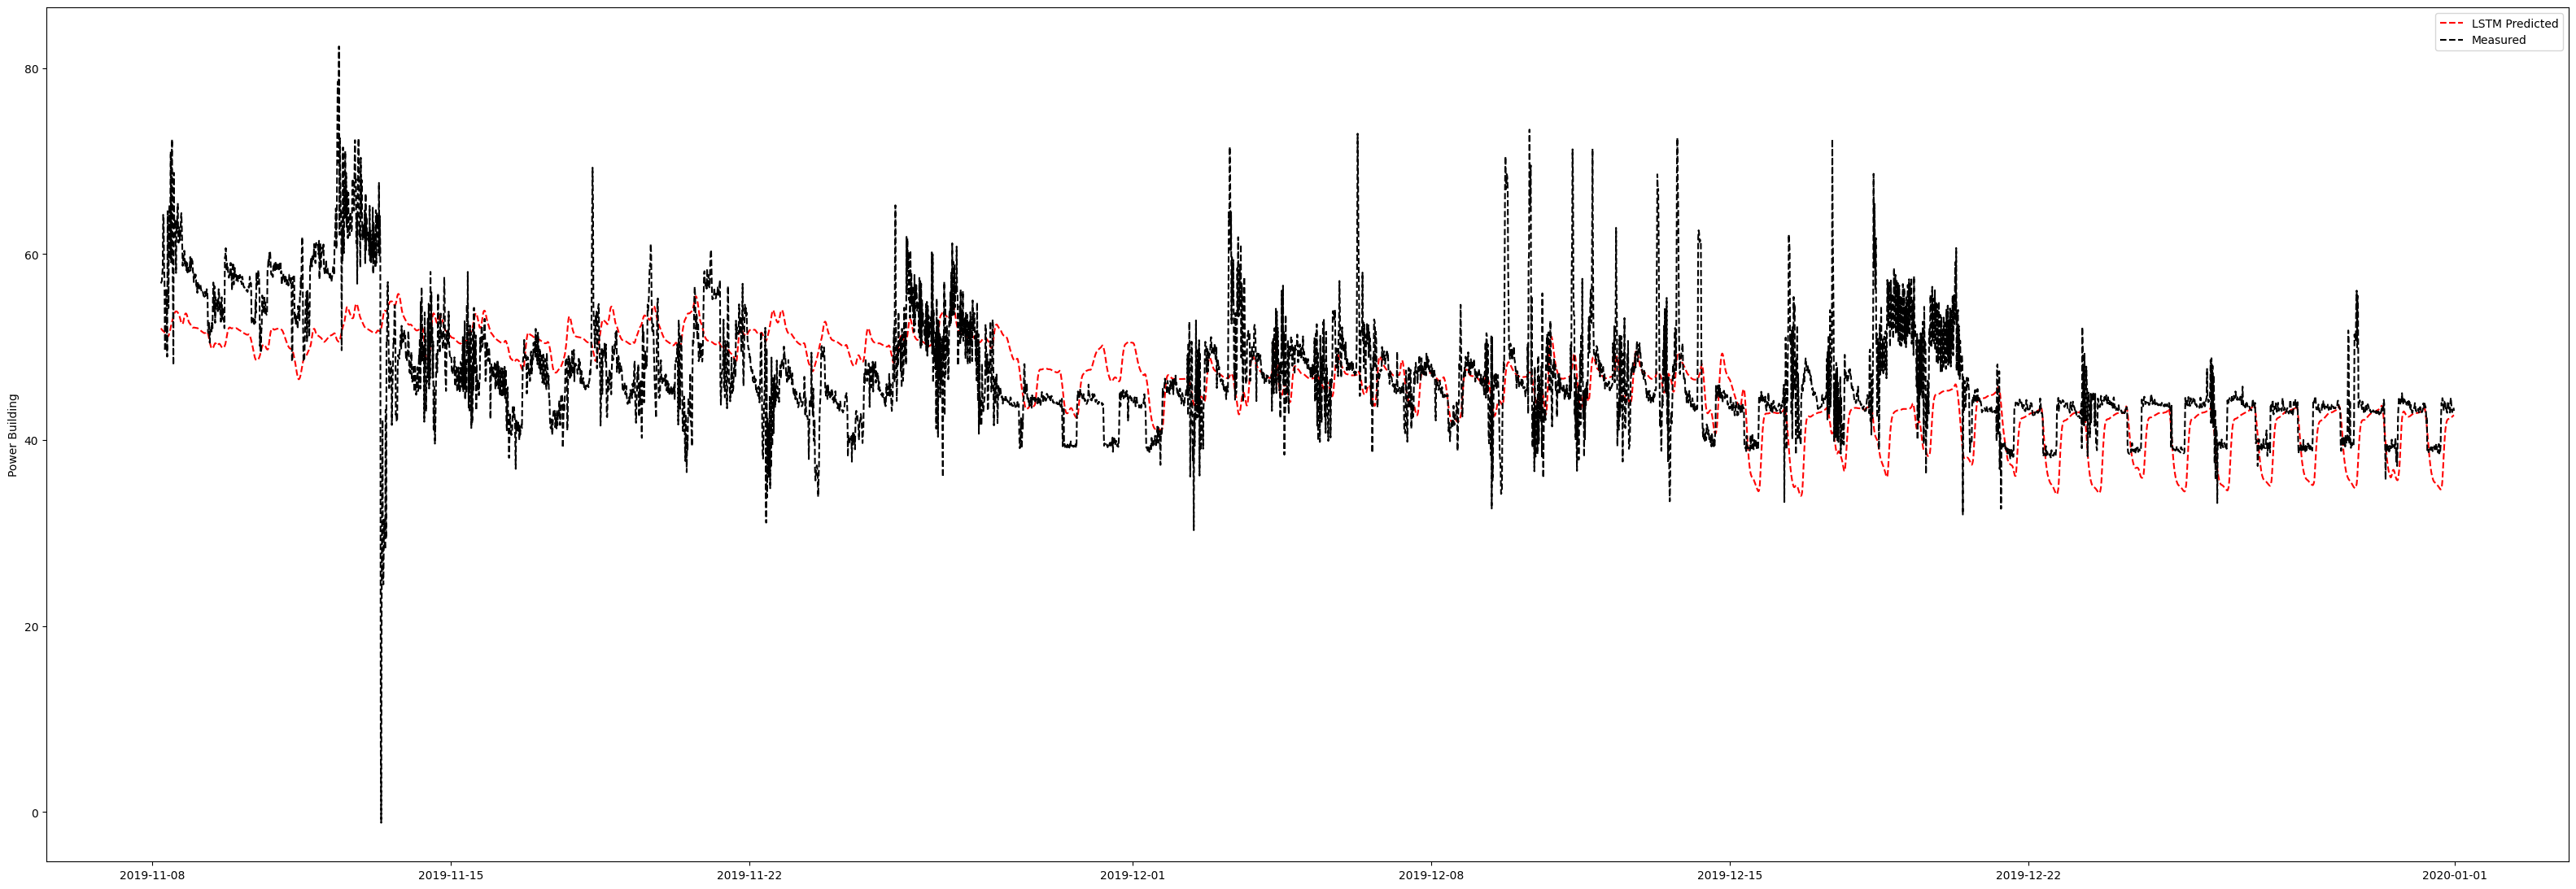

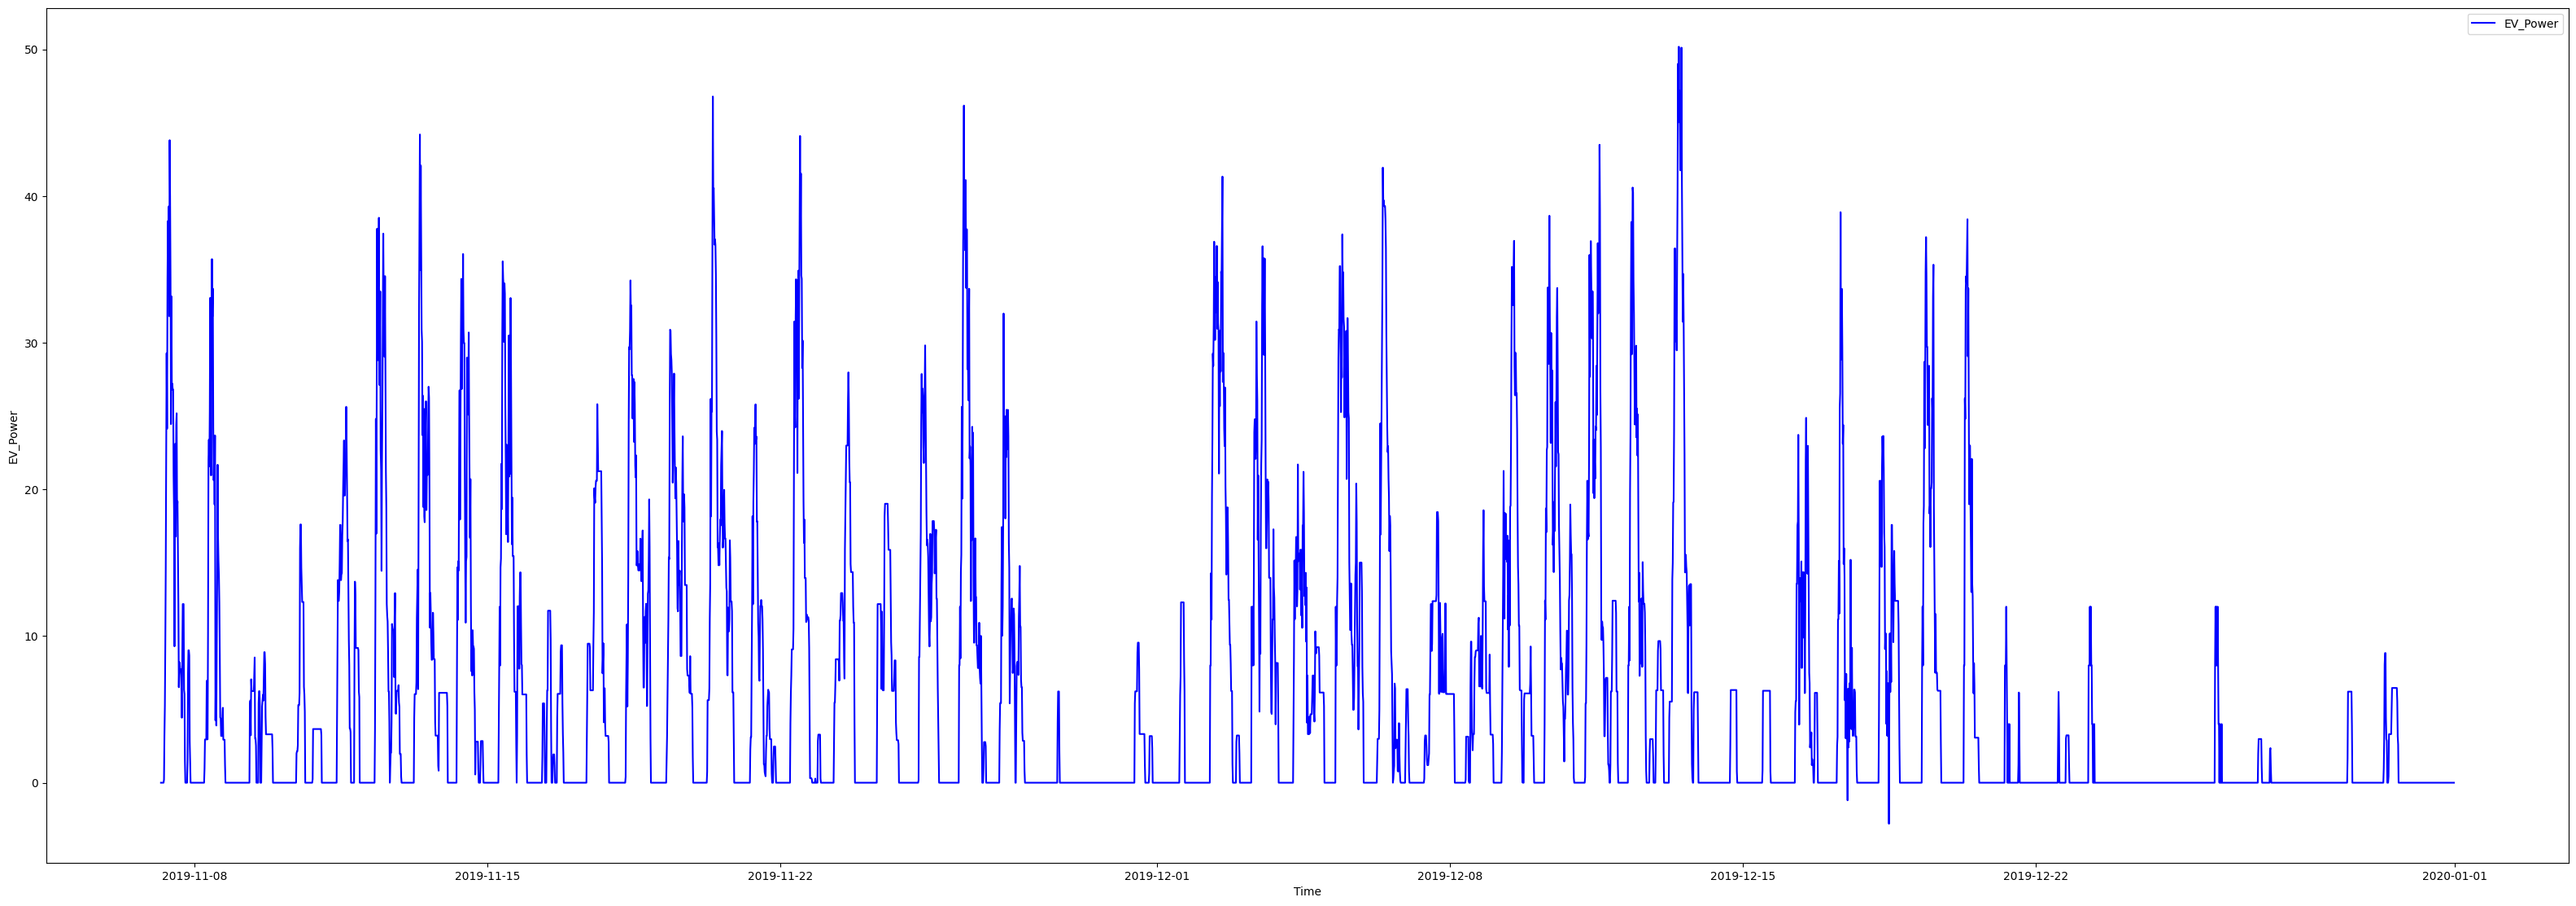

In [ ]:
plt.figure(figsize=(40,30))
plt.subplot(2,1,1)
plt.plot(X_test["DateTime"][window:], Ytu, "r--", label="LSTM Predicted")
plt.plot(X_test["DateTime"][window:], Ytm, "k--", label="Measured")
plt.ylabel("Power Building")
plt.legend()

plt.figure(figsize=(40,30))
plt.subplot(2,1,1)
plt.plot(X_test["DateTime"], X_test["EV_Power"],"b-", label="EV_Power")
plt.xlabel("Time")
plt.ylabel("EV_Power")
plt.legend()